In [1]:
# Author : Martin Thoma 
# URL : https://martin-thoma.com/classify-mnist-with-pybrain/

from struct import unpack
import gzip
import numpy as np
from numpy import zeros, uint8, float32

def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

x_train, y_train = get_labeled_data("train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz")
x_test, y_test = get_labeled_data("t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz")



i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


Label: [5]


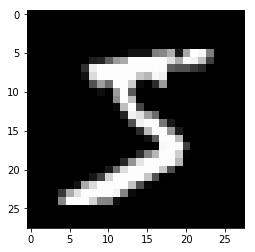

In [4]:
from pylab import imshow, show, cm


def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()
    
view_image(x_train[0], y_train[0])

In [27]:
from scipy.stats import norm

def naiveBayes(train_set, train_labels, test_set):
    # return predicted labels of test set

    dict_train_label = {}
    probability = {}
    for i in range(0, 10):
        dict_train_label[i] = list(np.where(np.asarray(train_labels) == i)[0])
        probability[i] = len(dict_train_label[i])/60000

    dict_train_set = {}
    for i in range(0, 10):
        dict_train_set = [train_set[j] for j in dict_train_label[i]]
        
    


#     # dictionary storing np.log(P(word|spam)). Key is the word in string
#     spam_dict = {}
#     # dictionary storing np.log(P(word|ham)). Key is the word in string
#     ham_dict = {}

#     # storing the (word count + smoothing_parameter) in the dict for each word
#     for l in spam_list:
#         for w in l:
#             if w in spam_dict:
#                 spam_dict[w] += 1
#             else:
#                 spam_dict[w] = 1+smoothing_parameter

#     for l in ham_list:
#         for w in l:
#             if w in ham_dict:
#                 ham_dict[w] += 1
#             else:
#                 ham_dict[w] = 1+smoothing_parameter

#     # consider the laplace smoothing
#     spam_dict['UNK'] = smoothing_parameter
#     ham_dict['UNK'] = smoothing_parameter

#     # now compute P(word|type) = 
#     # (word count + smoothing_parameter)/(tot # of words + smoothing_parameter*(# of different words + 1))
#     # take the log and store in the dict
#     denominator_spam = spam_word_count+smoothing_parameter*(len(spam_dict)+1)
#     denominator_ham = ham_word_count+smoothing_parameter*(len(ham_dict)+1)

#     for key in spam_dict.keys():
#         n = spam_dict[key]
#         spam_dict[key] = np.log(n/denominator_spam)
#     for key in ham_dict.keys():
#         n = ham_dict[key]
#         ham_dict[key] = np.log(n/denominator_ham)

#     # computing the probability for the dev_set. calculate both P(words|ham) and P(words|spam), and compare which
#     # is larger
#     dev_label = []
#     for email in dev_set:
#         P_spam = 0
#         P_ham = 0
#         for word in email:
#             if word in spam_dict.keys():
#                 P_spam += spam_dict[word]
#             else:
#                 P_spam += spam_dict['UNK']

#             if word in ham_dict.keys():
#                 P_ham += ham_dict[word]
#             else:
#                 P_ham += ham_dict['UNK']
#         if P_spam > P_ham:
#             dev_label.append(1)
#         else:
#             dev_label.append(0)

#     return dev_label

naiveBayes(x_train, y_train, x_test)

60000
